# Polymarket Analysis
https://docs.polymarket.com/
https://pandas.pydata.org/
https://matplotlib.org/

THe following libraries must be installed:
Polymarket's CLOB Client: 'pip install py-clob-client'
Pandas
Matplotlib: 'pip install matplotlib'

Import Libraries and Initialise Client

In [2]:
from py_clob_client.client import ClobClient
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the client
host = "https://clob.polymarket.com/"
chain_id = 1
client = ClobClient(host, chain_id=chain_id)
print("Script started")

Script started


Define Function to Fetch Prices

In [3]:
# Function to fetch the current price for a given token ID
def display_current_prices(token_id):
    try:
        buy_price = client.get_price(token_id=token_id, side="buy")['price']
        sell_price = client.get_price(token_id=token_id, side="sell")['price']
        return buy_price, sell_price
    except Exception as e:
        print(f"Error fetching prices for Token ID {token_id}: {e}")
        return None, None

Fetch Market Data

In [4]:
# Fetching market data
resp = client.get_markets(next_cursor="MTAx")

Process and Organize Data into a DataFrame

In [5]:
market_data = []

if 'data' in resp:
    for market in resp['data']:
        for token in market['tokens']:
            buy_price, sell_price = display_current_prices(token['token_id'])
            market_data.append({
                "Condition ID": market['condition_id'],
                "Description": market.get('description', 'No description'),
                "Category": market.get('category', 'No category'),
                "End Date": market.get('end_date_iso', 'No end date'),
                "Active": market['active'],
                "Closed": market['closed'],
                "Token ID": token['token_id'],
                "Outcome": token['outcome'],
                "Buy Price": buy_price,
                "Sell Price": sell_price
            })

df = pd.DataFrame(market_data)
df.head()  # Display the first few rows to check the data

,Condition ID,Description,Category,End Date,Active,Closed,Token ID,Outcome,Buy Price,Sell Price
0,0x050cc9439c7e4c4b94ceb606797324db96005043e4ac...,"In the upcoming NBA game, scheduled for April ...",No category,2023-04-04T00:00:00Z,True,True,3388491460463634888716293476933215386054635890...,Bulls,0,1
1,0x050cc9439c7e4c4b94ceb606797324db96005043e4ac...,"In the upcoming NBA game, scheduled for April ...",No category,2023-04-04T00:00:00Z,True,True,4105022847428068328494449988687786192998437487...,Hawks,0,1
2,0x0516761fa71adb2ac2822ad697e7b8c95b09ecb6d508...,"In the upcoming NHL game, scheduled for March ...",No category,2023-03-25T00:00:00Z,True,True,2300085749414226010935176792470540480104717755...,Sabres,0,1
3,0x0516761fa71adb2ac2822ad697e7b8c95b09ecb6d508...,"In the upcoming NHL game, scheduled for March ...",No category,2023-03-25T00:00:00Z,True,True,8361695085348722917853193799589338692041017438...,Islanders,0,1
4,0x05283d0b93c2a4bdc2b0c5e211a6fbe7fa80f787633c...,"In the upcoming NFL game, scheduled for Octobe...",No category,2023-10-15T00:00:00Z,True,True,3168083524273964172677838537507303268772754286...,Lions,0,1


Data Visualization

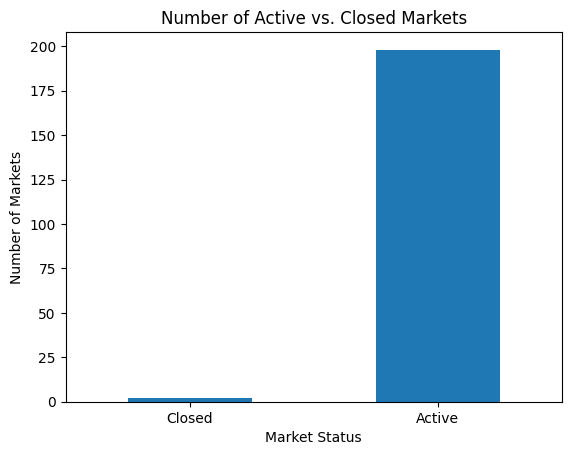

In [6]:
# Example visualization: Number of Active vs. Closed Markets
active_closed_counts = df.groupby('Active')['Condition ID'].count()
active_closed_counts.plot(kind='bar', title='Number of Active vs. Closed Markets')
plt.xlabel('Market Status')
plt.ylabel('Number of Markets')
plt.xticks(ticks=[0, 1], labels=['Closed', 'Active'], rotation=0)  # Adjust labels
plt.show()